In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Data PreProcessing

In [3]:
data=pd.read_csv("C:/Users/Admin/Downloads/Data_DS-Assignment.csv")

In [4]:
data.columns


Index(['Customer_ID', 'TOTALQUANTITY', 'Main_Plates_Sale',
       'Salads_&_Powerbowls_Sale', 'Salads_Sale', 'Beverages_Sale',
       'Mixed_Drinks_Sale', 'Pastas_Sale', 'Soups_Sale', 'Beer_Sale',
       'Spirits_Sale', 'Wine_Sale', 'Mains_Sale', 'Pizza_Sale', 'NABs_Sale',
       'Specialty_Sale', 'Appetizers_Sale', 'Small_Plates_Sale',
       'Lunch_Duos_Sale', 'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale',
       'Sandwiches_Sale', 'TOTAL_DISCOUNT', '%_Alcohol_of_Bill', 'GUEST_COUNT',
       'DISTANCE_TO_CLOSESTSTORE', 'SECONDVISITFLAG'],
      dtype='object')

In [5]:
data.shape

(239746, 28)

In [6]:
data.describe()

,Customer_ID,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,...,Small_Plates_Sale,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE
count,2.397460e+05,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,...,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,238561.000000
mean,1.471446e+08,4.962035,2.668773,0.355731,5.882149,0.082555,1.848684,5.902421,0.532838,0.444401,...,0.831473,2.198858,0.474971,0.955284,0.042451,0.519163,4.171373,5.370109,1.585023,20.585448
std,8.910179e+06,4.395055,9.120996,6.618377,12.850325,1.481635,6.509682,15.213864,2.520602,2.515728,...,2.892918,7.862741,14.498232,4.110883,1.964961,8.420815,8.196152,14.831186,1.449732,50.689918
min,1.367098e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.394777e+08,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.319105
50%,1.437634e+08,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.569343
75%,1.536307e+08,6.000000,0.000000,0.000000,12.590000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,12.450748
max,1.680222e+08,389.000000,335.880000,840.000000,2128.500000,253.000000,251.390000,1998.210000,170.810000,190.120000,...,349.500000,688.240000,2250.000000,360.000000,264.440000,1500.000000,550.000000,100.000000,235.000000,285.789635


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239746 entries, 0 to 239745
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               239746 non-null  int64  
 1   TOTALQUANTITY             239746 non-null  int64  
 2   Main_Plates_Sale          239746 non-null  float64
 3   Salads_&_Powerbowls_Sale  239746 non-null  float64
 4   Salads_Sale               239746 non-null  float64
 5   Beverages_Sale            239746 non-null  float64
 6   Mixed_Drinks_Sale         239746 non-null  float64
 7   Pastas_Sale               239746 non-null  float64
 8   Soups_Sale                239746 non-null  float64
 9   Beer_Sale                 239746 non-null  float64
 10  Spirits_Sale              239746 non-null  float64
 11  Wine_Sale                 239746 non-null  float64
 12  Mains_Sale                239746 non-null  float64
 13  Pizza_Sale                239746 non-null  f

In [72]:
data

,Customer_ID,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,...,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE,SECONDVISITFLAG
0,138721796,17,0.0,0.0,26.28,0.0,0.0,0.00,6.99,0.0,...,22.90,0.0,0.00,0.0,0.0,0.00,0.0,6,4.468420,N
1,138530825,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,10.00,0.0,1,4.468420,N
2,138722449,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,4.468420,N
3,138729131,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,6.29,0.0,0.0,0.00,0.0,1,1.531161,N
4,138725186,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,1.531161,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239741,154236949,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,5.00,0.0,1,3.549361,Y
239742,154239880,10,0.0,55.0,57.97,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,11.908136,Y
239743,154242996,5,0.0,0.0,0.00,0.0,0.0,9.12,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,31.40,0.0,1,6.669160,Y
239744,154242268,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,12.951460,Y


In [9]:
data.isnull().sum()

Customer_ID                    0
TOTALQUANTITY                  0
Main_Plates_Sale               0
Salads_&_Powerbowls_Sale       0
Salads_Sale                    0
Beverages_Sale                 0
Mixed_Drinks_Sale              0
Pastas_Sale                    0
Soups_Sale                     0
Beer_Sale                      0
Spirits_Sale                   0
Wine_Sale                      0
Mains_Sale                     0
Pizza_Sale                     0
NABs_Sale                      0
Specialty_Sale                 0
Appetizers_Sale                0
Small_Plates_Sale              0
Lunch_Duos_Sale                0
Combo_Boxes_Sale               0
Desserts_Sale                  0
Kids_Sale                      0
Sandwiches_Sale                0
TOTAL_DISCOUNT                 0
%_Alcohol_of_Bill              0
GUEST_COUNT                    0
DISTANCE_TO_CLOSESTSTORE    1185
SECONDVISITFLAG                0
dtype: int64

In [10]:
data_new=data.copy()

In [11]:
data_new.drop('Customer_ID',axis=1,inplace=True)

In [12]:
#drop null values
data_cleaned=data_new.dropna(subset=['DISTANCE_TO_CLOSESTSTORE'],inplace=True)

In [13]:
data_new['DISTANCE_TO_CLOSESTSTORE'].isnull().sum()

0

In [14]:
data_new

,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,Spirits_Sale,...,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE,SECONDVISITFLAG
0,17,0.0,0.0,26.28,0.0,0.0,0.00,6.99,0.0,0.0,...,22.90,0.0,0.00,0.0,0.0,0.00,0.0,6,4.468420,N
1,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,10.00,0.0,1,4.468420,N
2,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,4.468420,N
3,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,6.29,0.0,0.0,0.00,0.0,1,1.531161,N
4,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,1.531161,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239741,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,5.00,0.0,1,3.549361,Y
239742,10,0.0,55.0,57.97,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,11.908136,Y
239743,5,0.0,0.0,0.00,0.0,0.0,9.12,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,31.40,0.0,1,6.669160,Y
239744,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,12.951460,Y


In [15]:
#after removing null values
data_new.isnull().sum()

TOTALQUANTITY               0
Main_Plates_Sale            0
Salads_&_Powerbowls_Sale    0
Salads_Sale                 0
Beverages_Sale              0
Mixed_Drinks_Sale           0
Pastas_Sale                 0
Soups_Sale                  0
Beer_Sale                   0
Spirits_Sale                0
Wine_Sale                   0
Mains_Sale                  0
Pizza_Sale                  0
NABs_Sale                   0
Specialty_Sale              0
Appetizers_Sale             0
Small_Plates_Sale           0
Lunch_Duos_Sale             0
Combo_Boxes_Sale            0
Desserts_Sale               0
Kids_Sale                   0
Sandwiches_Sale             0
TOTAL_DISCOUNT              0
%_Alcohol_of_Bill           0
GUEST_COUNT                 0
DISTANCE_TO_CLOSESTSTORE    0
SECONDVISITFLAG             0
dtype: int64

In [16]:
#finfing the duplicates values
data_new.duplicated().sum()

18941

In [17]:
data_new.kurtosis()

C:\Users\Admin\AppData\Local\Temp/ipykernel_13700/2467816950.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_new.kurtosis()


TOTALQUANTITY                 593.310286
Main_Plates_Sale               59.876691
Salads_&_Powerbowls_Sale     2766.625302
Salads_Sale                  3191.118246
Beverages_Sale               4895.025769
Mixed_Drinks_Sale              60.489936
Pastas_Sale                  1654.641172
Soups_Sale                    139.436426
Beer_Sale                     239.536594
Spirits_Sale                  807.241894
Wine_Sale                     112.469869
Mains_Sale                  17141.192710
Pizza_Sale                    770.893369
NABs_Sale                      51.373684
Specialty_Sale               8459.585455
Appetizers_Sale               130.283786
Small_Plates_Sale             917.718201
Lunch_Duos_Sale               511.217286
Combo_Boxes_Sale             6694.389265
Desserts_Sale                 566.038589
Kids_Sale                    5863.934749
Sandwiches_Sale              6592.945743
TOTAL_DISCOUNT                340.401123
%_Alcohol_of_Bill              15.962611
GUEST_COUNT     

In [18]:
data_new.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_13700/2944107810.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_new.skew()


TOTALQUANTITY                11.994554
Main_Plates_Sale              5.480368
Salads_&_Powerbowls_Sale     37.326987
Salads_Sale                  23.442756
Beverages_Sale               49.580917
Mixed_Drinks_Sale             5.603769
Pastas_Sale                  19.492216
Soups_Sale                    7.280322
Beer_Sale                    10.003684
Spirits_Sale                 22.750118
Wine_Sale                     8.978614
Mains_Sale                  108.374499
Pizza_Sale                   13.966404
NABs_Sale                     4.090136
Specialty_Sale               60.245467
Appetizers_Sale               6.303356
Small_Plates_Sale            11.544174
Lunch_Duos_Sale              12.219448
Combo_Boxes_Sale             63.694164
Desserts_Sale                13.926759
Kids_Sale                    67.162915
Sandwiches_Sale              60.017177
TOTAL_DISCOUNT                9.529681
%_Alcohol_of_Bill             3.679571
GUEST_COUNT                  21.063529
DISTANCE_TO_CLOSESTSTORE 

# step 2: EDA(Explorotery Data Analysis)

# Column Description
1.Customer_ID: Unique identifier for each customer. This is often used to track individual customers' purchases and behaviors.

2.TOTALQUANTITY: The total quantity of items purchased. This can help assess overall purchase volume.This column aggregates the quantities of all types of items bought in a single purchase.

3.Main_Plates_Sale: Revenue from sales of main plates. This represents sales data specifically for main course dishes.likely in dollars

4.Salads_&_Powerbowls_Sale: Revenue from sales of salads and power bowls. This indicates the sales of these particular items.likely in dollars

5.Salads_Sale: Revenue from sales of salads. This is likely a subset of Salads_&_Powerbowls_Sale.likely in dollars

6.Beverages_Sale: Revenue from sales of beverages. This includes all drink sales.likely in dollars

7.Mixed_Drinks_Sale: Revenue from sales of mixed drinks. This is a specific category of beverages.likely in dollars

8.Pastas_Sale: Revenue from sales of pasta dishes.likely in dollars

9.Soups_Sale: Revenue from sales of soups.likely in dollars

10.Beer_Sale: Revenue from sales of beer.likely in dollars

11Spirits_Sale: Revenue from sales of spirits (e.g., vodka, whiskey).likely in dollars

12.Wine_Sale: Revenue from sales of wine.likely in dollars

13.Mains_Sale: Revenue from sales of main dishes. This might overlap with Main_Plates_Sale.likely in dollars

14.Pizza_Sale: Revenue from sales of pizza.likely in dollars

15.NABs_Sale: Revenue from sales of NABs (Non-Alcoholic Beverages). If NABs are not specifically defined, this typically means beverages that do not contain alcohol.likely in dollars

16.Specialty_Sale: Revenue from sales of specialty items. This could include unique or high-margin items.likely in dollars

17.Appetizers_Sale: Revenue from sales of appetizers.likely in dollars

18.Small_Plates_Sale: Revenue from sales of small plates or tapas-style dishes.likely in dollars

19.Lunch_Duos_Sale: Revenue from sales of lunch duo combinations. These might be special menu items or combos.likely in dollars

20.Combo_Boxes_Sale: Revenue from sales of combo boxes, which might include a mix of various items at a set price.likely in dollars

21.Desserts_Sale: Revenue from sales of desserts.likely in dollars

22.Kids_Sale: Revenue from sales of kids' meals.likely in dollars

23.Sandwiches_Sale: Revenue from sales of sandwiches.likely in dollars

24.TOTAL_DISCOUNT: Total discount applied to the order. This helps assess the impact of discounts on sales.likely in dollars

25.%_Alcohol_of_Bill: Percentage of the total bill that is attributed to alcoholic beverages.float %

26.GUEST_COUNT: Number of guests or people at the table. This can help understand average spending per guest.int

27.DISTANCE_TO_CLOSESTSTORE: Distance from the customer to the closest store. This might be used to analyze customer proximity and its impact on sales.miles or km

28.SECONDVISITFLAG: A flag indicating whether this is a second visit by the customer. This could be a binary value (e.g., 0 for first visit, 1 for second visit) and helps in analyzing repeat customer behavior.object.

# 1.What percentage of transactions are second visits?

In [73]:
#before resampling the value_counts of secondvisit are:
repeat_visit=data_new['SECONDVISITFLAG'].value_counts()
print('Before resampling: ','\n',repeat_visit)

Before resampling:  
 0    213665
1     24896
Name: SECONDVISITFLAG, dtype: int64


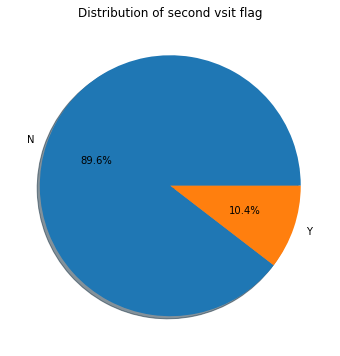

In [20]:
plt.figure(figsize=(10,6))
repeat_visit=data_new['SECONDVISITFLAG'].value_counts()
plt.pie(repeat_visit,labels=repeat_visit.index,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of second vsit flag')
plt.show()

From the above pie chart, we conclude that the percentage of transactions during the second visit is less than 10.4%, compared to those who only visit for the first time, which is 89.6%.

# 2.How does customer behavior differ between first and second visits?

# a.Compare Total Quantity Purchased vs Second Visit

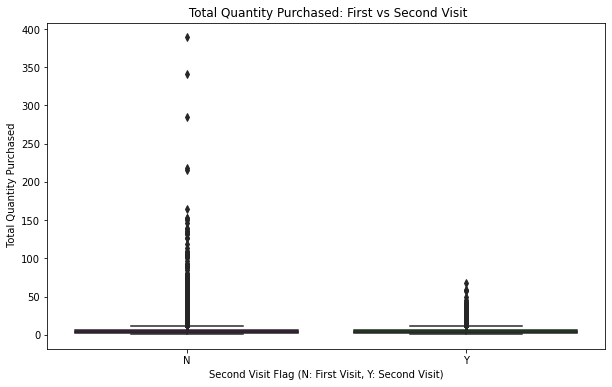

In [21]:
plt.figure(figsize=(10, 6))
palette={'Y':'green','N':'purple'}
sns.boxplot(x='SECONDVISITFLAG', y='TOTALQUANTITY', data=data_new,palette=palette)
plt.title(' Total Quantity Purchased: First vs Second Visit')
plt.xlabel('Second Visit Flag (N: First Visit, Y: Second Visit)')
plt.ylabel(' Total Quantity Purchased')
plt.show()


The box plot shows that the total quantity of items purchased on the first visit (indicated by 'N') can be as high as 400, while the total quantity purchased on the second visit (indicated by 'Y') is significantly lower, with a maximum around 50. This suggests that customers tend to purchase more items during their first visit compared to their second visit

# b. Compare Average Spending per Customer

In [22]:
col_sales=['Main_Plates_Sale',
       'Salads_&_Powerbowls_Sale', 'Salads_Sale', 'Beverages_Sale',
       'Mixed_Drinks_Sale', 'Pastas_Sale', 'Soups_Sale', 'Beer_Sale',
       'Spirits_Sale', 'Wine_Sale', 'Mains_Sale', 'Pizza_Sale', 'NABs_Sale',
       'Specialty_Sale', 'Appetizers_Sale', 'Small_Plates_Sale',
       'Lunch_Duos_Sale', 'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale',
       'Sandwiches_Sale']
data_new['Total_Sales']=data_new[col_sales].sum(axis=1)


In [23]:
len(col_sales)

21

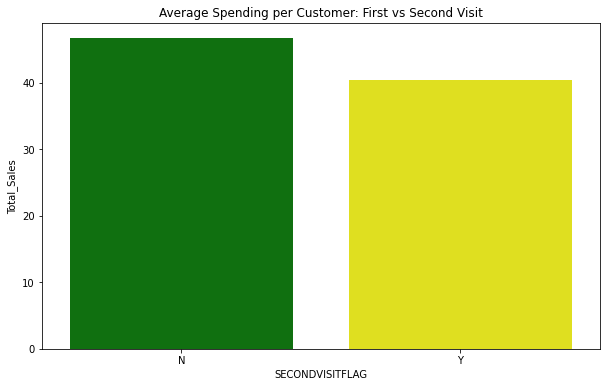

In [24]:
plt.figure(figsize=(10,6))
palette={'Y':'yellow','N':'green'}
avg_sales=data_new.groupby('SECONDVISITFLAG')['Total_Sales'].mean().reset_index()
#plt.barh(avg_sales['SECONDVISITFLAG'],avg_sales['Total_Sales'])
sns.barplot(x='SECONDVISITFLAG',y='Total_Sales',data=avg_sales,palette=palette)
plt.title('Average Spending per Customer: First vs Second Visit')
plt.show()

The bar plot shows that average spending per customer is higher during the first visit, exceeding 40 units, compared to repeat visits, which are below 40 units

# c: Compare Item Categories Purchased

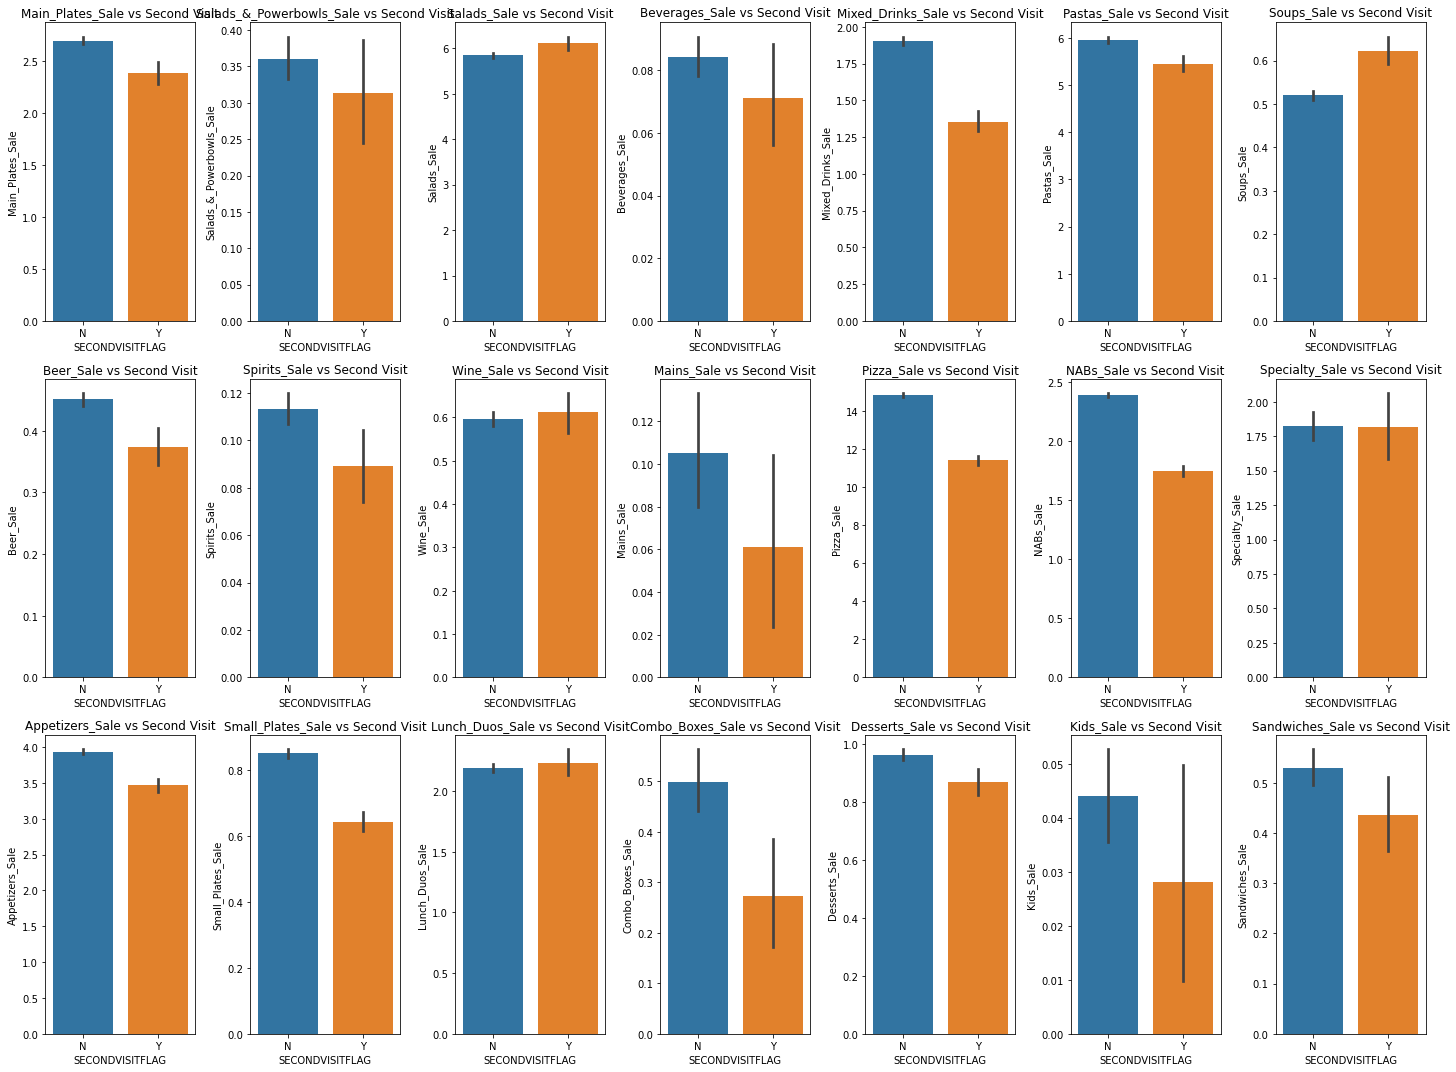

In [25]:
plt.figure(figsize=(20, 15))
col_sales = [
    'Main_Plates_Sale', 'Salads_&_Powerbowls_Sale', 'Salads_Sale', 
    'Beverages_Sale', 'Mixed_Drinks_Sale', 'Pastas_Sale', 'Soups_Sale', 
    'Beer_Sale', 'Spirits_Sale', 'Wine_Sale', 'Mains_Sale', 'Pizza_Sale', 
    'NABs_Sale', 'Specialty_Sale', 'Appetizers_Sale', 'Small_Plates_Sale', 
    'Lunch_Duos_Sale', 'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale', 
    'Sandwiches_Sale'
]

plot_num = 1
for col in col_sales:
    if plot_num <= 21:
        ax=plt.subplot(3, 7, plot_num)
        sns.barplot(x='SECONDVISITFLAG', y=col, data=data_new)
        plt.title(f'{col} vs Second Visit')
        plot_num += 1
plt.tight_layout()
plt.show()

The bar plots illustrate the differences in sales for various item categories (e.g., Main Plates, Salads, Beverages) between first-time visitors and repeat customers.

# 3.What is the average total quantity of items purchased per transaction?

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


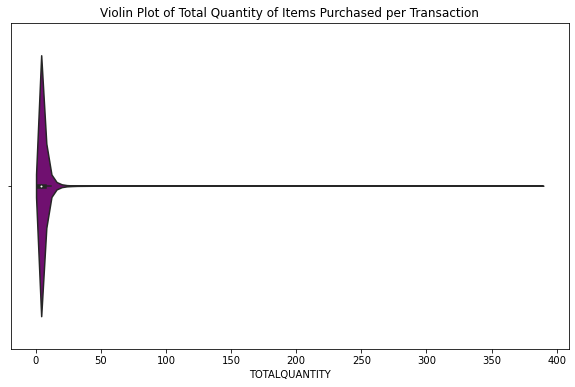

In [26]:
plt.figure(figsize=(10,6))
avg_total_quantity=data_new['TOTALQUANTITY'].mean()
sns.violinplot(data_new['TOTALQUANTITY'],color='purple')
plt.title('Violin Plot of Total Quantity of Items Purchased per Transaction')

plt.show()

It's a clear peak, it indicates that many transactions have a similar total quantity of items.


# 4.What is the total revenue from main plates?

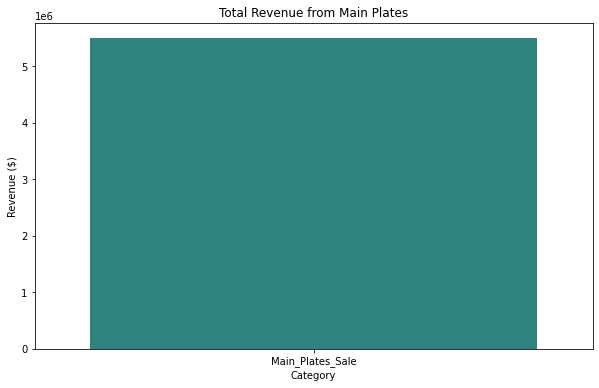

In [27]:
data_new['Main_Plate_Revenue']=data_new['Main_Plates_Sale']*data_new['TOTALQUANTITY']
total_revenue=data_new['Main_Plate_Revenue'].sum()
# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Category': ['Main_Plates_Sale'],
    'Total_Revenue': [total_revenue]
})

# Plot the total revenue from main plates
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total_Revenue', data=summary_df, palette='viridis')

# Add title and labels
plt.title('Total Revenue from Main Plates')
plt.ylabel('Revenue ($)')
plt.xlabel('Category')

# Show the plot
plt.show()


The plot indicates that main plates have generated substantial revenue. Given that the total revenue is around 5.5 million dollars, it is clear that main plates are a significant contributor to overall sales.the total revenue from main plates sales, showing that this category alone has generated a significant amount of revenue

# 6.What percentage of total sales is from salads?


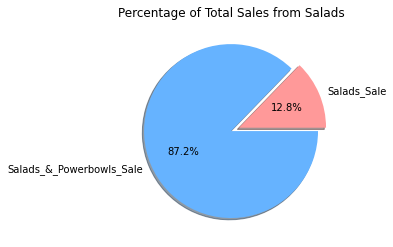

In [28]:
total_sales=data_new['Total_Sales'].sum()
total_salad=data_new['Salads_Sale'].sum()
pect_salad_sales=(total_salad/total_sales)*100
labels=['Salads_Sale','Salads_&_Powerbowls_Sale']
sizes=[total_salad,total_sales-total_salad]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Total Sales from Salads')
plt.show()

 The pie chart shows that a smaller portion of the total sales comes from salads (12.8%), whereas the majority of sales (87.2%) come from other categories.


# 7.What are the top-selling beverages?

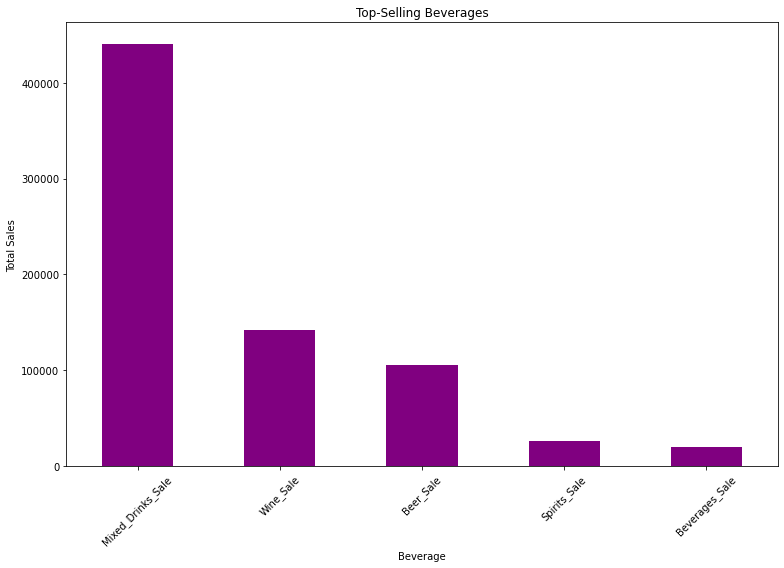

In [29]:
top_selling_beverages=data_new[['Beverages_Sale','Mixed_Drinks_Sale','Beer_Sale','Wine_Sale','Spirits_Sale']].sum().sort_values(ascending=False)
# Plot
plt.figure(figsize=(11, 8))

top_selling_beverages.plot(kind='bar', color='purple')
plt.title('Top-Selling Beverages')
plt.xlabel('Beverage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

the plot indicates that the top-selling beverage is Mixed_Drinks_Sale , which has the highest total sales, exceeding 400,000. This surpasses other beverages such as Wine_Sale, Beer_Sale, Spirits_Sale and Beverages_Sale

# 8. How do beverage sales correlate with the total bill?

In [30]:
correlation=data_new['Beverages_Sale'].corr(data_new['Total_Sales'])
print(f'correlation of beverage and total sales are: {correlation}')

correlation of beverage and total sales are: 0.27604118159176666


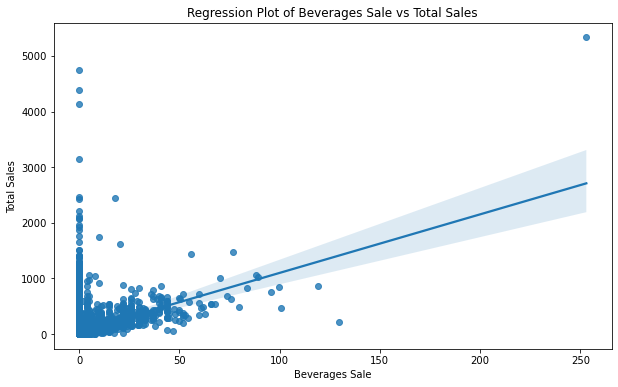

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Beverages_Sale', y='Total_Sales', data=data_new)
plt.title('Regression Plot of Beverages Sale vs Total Sales')
plt.xlabel('Beverages Sale')
plt.ylabel('Total Sales')
plt.show()

The plot shows a positive correlation between beverage sales and total sales.

A correlation coefficient of 0.276 indicates a weak positive relationship between beverage sales and total sales, meaning that as beverage sales increase, total sales tend to increase slightly, but the relationship is not very strong.

# 9.What is the distribution of pasta sales across different stores?

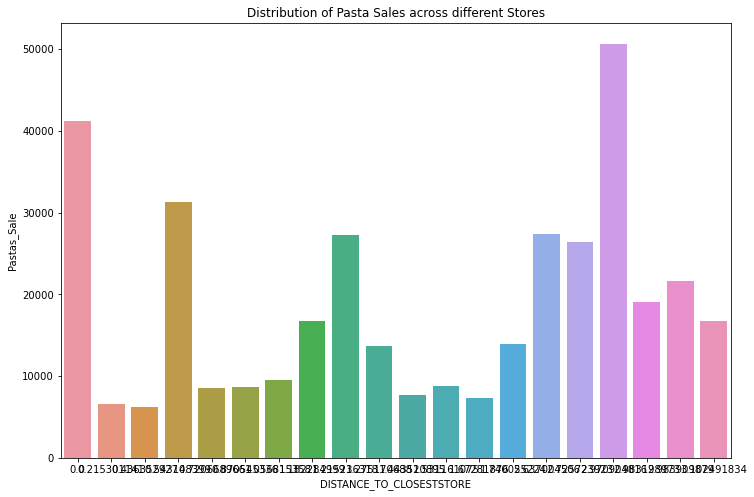

In [32]:
pasta_sale_dist=data_new.groupby('DISTANCE_TO_CLOSESTSTORE')['Pastas_Sale'].sum().reset_index().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x='DISTANCE_TO_CLOSESTSTORE',y='Pastas_Sale',data=pasta_sale_dist)
plt.title("Distribution of Pasta Sales across different Stores")
plt.show()

Pasta sales vary significantly across different distances to the closest store, with certain distances showing notably higher sales .

# 10.How do NAB sales compare to alcoholic beverage sales?

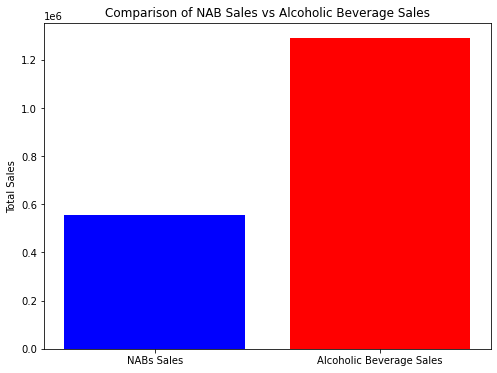

In [33]:
total_nab_sales=data_new['NABs_Sale'].sum()
total_alcoholic_sales=data_new[['Beverages_Sale','Mixed_Drinks_Sale','Beer_Sale','Wine_Sale','Spirits_Sale','NABs_Sale']].sum().sum()
# Data for plotting
categories = ['NABs Sales', 'Alcoholic Beverage Sales']
values = [total_nab_sales, total_alcoholic_sales]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'red'])
plt.title('Comparison of NAB Sales vs Alcoholic Beverage Sales')
plt.ylabel('Total Sales')
plt.show()


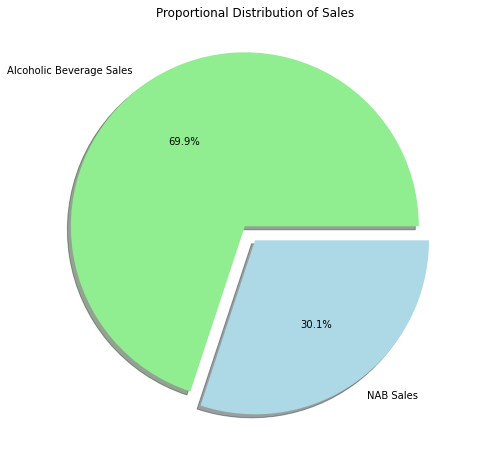

In [34]:
# Data for plotting
categories = ['Alcoholic Beverage Sales', 'NAB Sales']
values = [total_alcoholic_sales, total_nab_sales]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['lightgreen', 'lightblue'],shadow=True,explode=(0.1,0))
plt.title('Proportional Distribution of Sales')
plt.show()


 alcoholic beverage sales are approximately 69.9% greater than NAB sales. This indicates that alcoholic beverages contribute a significantly larger portion to the overall revenue compared to NABs.

# 11.How do specialty item sales impact total revenue?

correlation of speciality_sales and total_sales are:0.45


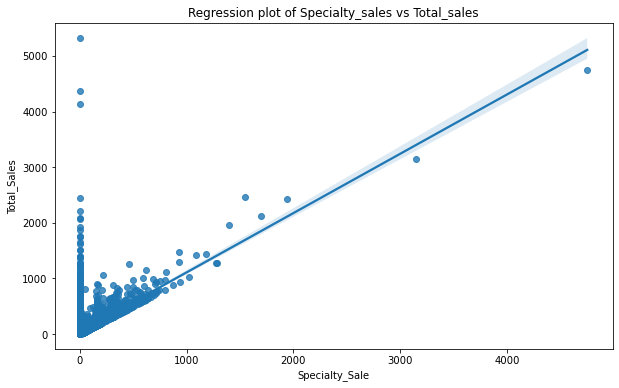

In [35]:
corr=data_new['Specialty_Sale'].corr(data_new['Total_Sales'])
print(f'correlation of speciality_sales and total_sales are:{corr:.2f}')
plt.figure(figsize=(10,6))
sns.regplot(x='Specialty_Sale',y='Total_Sales',data=data_new)
plt.title("Regression plot of Specialty_sales vs Total_sales")
plt.show()

The moderate positive correlation of 0.45 between specialty item sales and total sales indicates that while specialty sales are positively associated with total sales, the relationship is not extremely strong.

Specialty items contribute to total revenue, but other factors also play a significant role in determining overall sales performance

# 12.What are the top-selling main dishes?

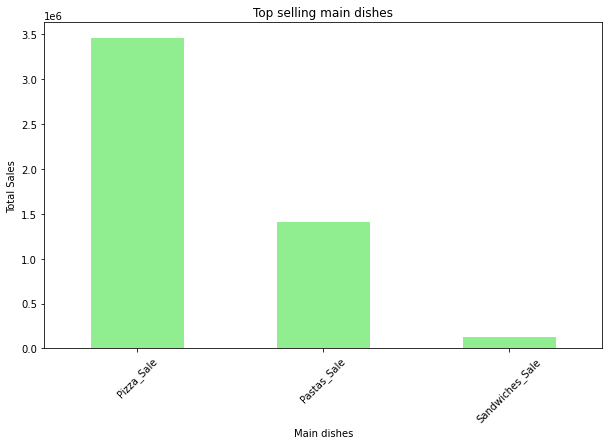

In [36]:
# Aggregate and sort sales for main dishes
top_selling_main_dishes = data_new[['Pizza_Sale', 'Pastas_Sale', 'Sandwiches_Sale']].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_selling_main_dishes.plot(kind='bar',color='lightgreen')

plt.title('Top selling main dishes')
plt.xlabel('Main dishes')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

Pizza sales significantly outperform other main dishes in terms of total revenue. This indicates a strong customer preference for pizza or possibly higher pricing and sales volume compared to pasta and sandwiches.

# 13.How do main sales compare to Dessert sales?

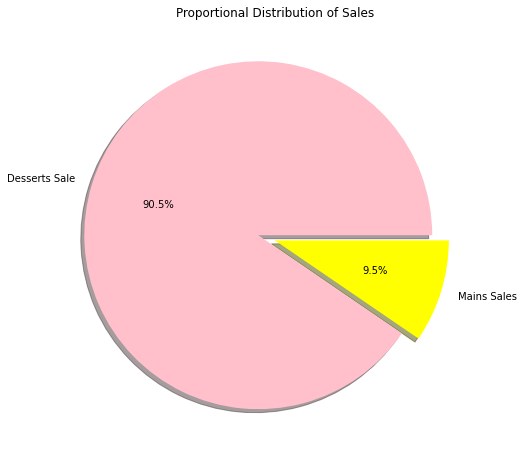

In [37]:
total_main_sales=data_new['Mains_Sale'].sum()
total_dessert_sales=data_new['Desserts_Sale'].sum()
# Data for plotting
categories = ['Desserts Sale', 'Mains Sales']
values = [total_dessert_sales, total_main_sales]

# Plot
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', colors=['pink', 'yellow'],shadow=True,explode=(0.1,0))
plt.title('Proportional Distribution of Sales')
plt.show()

Desserts Sales are approximately 90.5% greater than Main dishes sales. This indicates that Desserts Sales contribute a significantly larger portion to the overall revenue compared to Mian sales.

# 14.How do discounts impact total sales?

Correlation : 0.008435217261571903


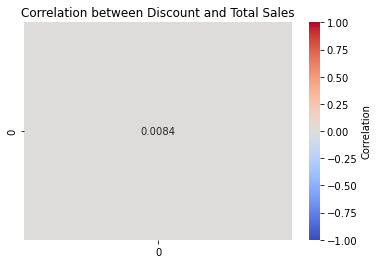

In [38]:
discount_sales_correlation = data_new['TOTAL_DISCOUNT'].corr(data_new['Total_Sales'])
print(f'Correlation : {discount_sales_correlation}')
plt.figure(figsize=(6, 4))
sns.heatmap([[discount_sales_correlation]], annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation between Discount and Total Sales')
plt.show()


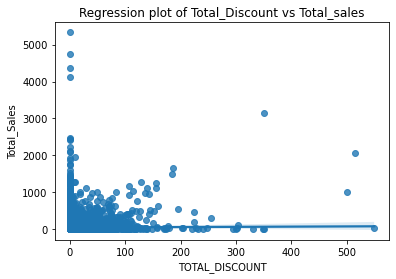

In [39]:
sns.regplot(x='TOTAL_DISCOUNT',y='Total_Sales',data=data_new)
plt.title("Regression plot of Total_Discount vs Total_sales")
plt.show()

The correlation of 0.0084 between total discount and total sales indicates that there is virtually no linear relationship between the two variables. This suggests that total discounts have a minimal impact on total sales, and other factors are likely more influential in determining overall sales performance.

# 15.How does guest count correlate with total bill?

correlation:  0.20


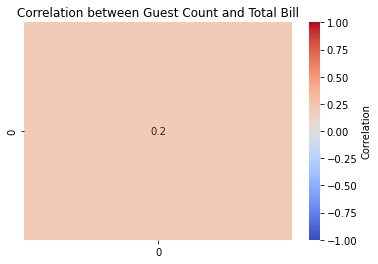

In [40]:
guest_count_bill_correlation = data_new['GUEST_COUNT'].corr(data_new['Total_Sales'])
print(f'correlation: {guest_count_bill_correlation: .2f}')
plt.figure(figsize=(6, 4))
sns.heatmap([[guest_count_bill_correlation]], annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation between Guest Count and Total Bill')
plt.show()


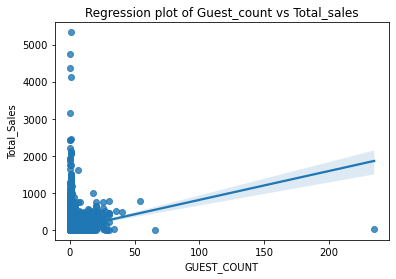

In [41]:
sns.regplot(x='GUEST_COUNT',y='Total_Sales',data=data_new)
plt.title('Regression plot of Guest_count vs Total_sales')
plt.show()

The correlation of 0.20 between guest count and total sales indicates a weak positive relationship. While a higher guest count is slightly associated with higher total sales, the correlation is weak, suggesting that other factors have a more substantial impact on total sales.

# 16.What is the distribution of distances to the closest store?

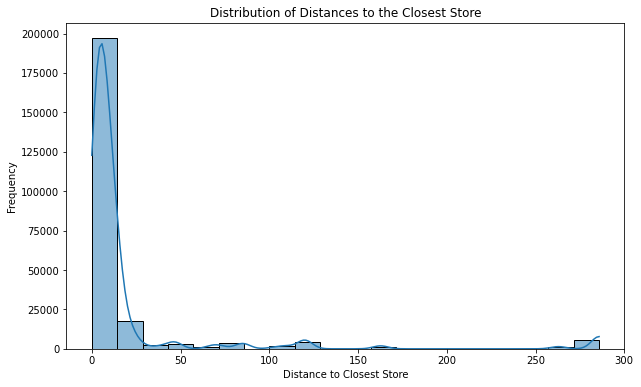

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data_new['DISTANCE_TO_CLOSESTSTORE'], bins=20, kde=True)
plt.title('Distribution of Distances to the Closest Store')
plt.xlabel('Distance to Closest Store')
plt.ylabel('Frequency')
plt.show()


The distribution graph indicates that most people live relatively close to the nearest store, with the highest frequency of locations around 50 units from the store and fewer locations at greater distances.

# 17. How does distance impact total sales?


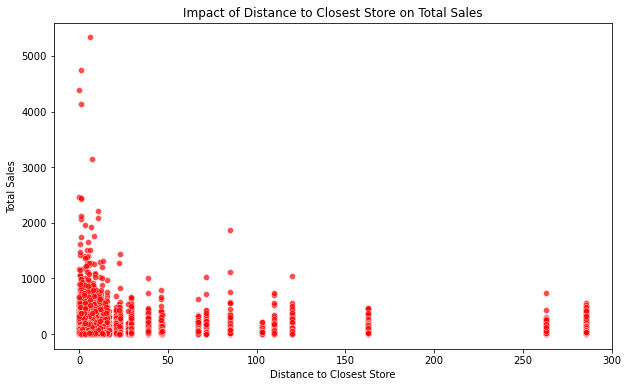

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISTANCE_TO_CLOSESTSTORE', y='Total_Sales', data=data_new, alpha=0.7,color='red')
plt.title('Impact of Distance to Closest Store on Total Sales')
plt.xlabel('Distance to Closest Store')
plt.ylabel('Total Sales')
plt.show()


The line graph slopes upwards as the distance to the closest store increases, which means that stores with a higher distance to the closest store have higher total sales. There could be other factors that influence total sales, such as the size of the store or the products that it sells.

# 18.How does the frequency of repeat customers compare to new customers across different guest counts?

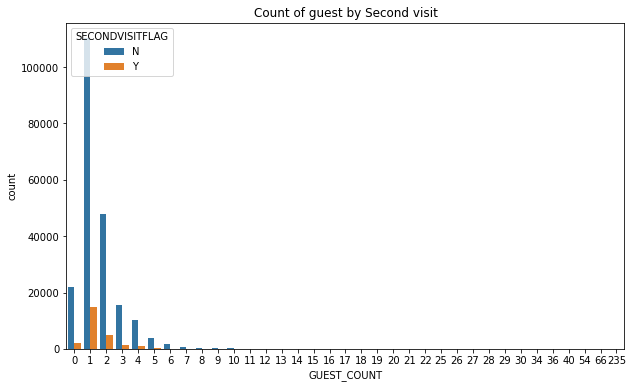

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x='GUEST_COUNT',data=data_new,hue='SECONDVISITFLAG')
plt.title('Count of guest by Second visit')
plt.show()

Most transactions involve 1 or 2 guests, with very few larger groups, and repeat customers significantly outnumber new ones, indicating high customer retention.

# 19.How do discounts impact the total sales of different items

In [45]:
# Define the columns representing different item sales
item_sales_columns = [
    'Main_Plates_Sale', 'Salads_&_Powerbowls_Sale', 'Salads_Sale', 
    'Beverages_Sale', 'Mixed_Drinks_Sale', 'Pastas_Sale', 'Soups_Sale', 
    'Beer_Sale', 'Spirits_Sale', 'Wine_Sale', 'Mains_Sale', 'Pizza_Sale', 
    'NABs_Sale', 'Specialty_Sale', 'Appetizers_Sale', 'Small_Plates_Sale', 
    'Lunch_Duos_Sale', 'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale', 
    'Sandwiches_Sale'
]

# Melt the DataFrame to long format for easier aggregation
melted_data = data.melt(id_vars=[ 'TOTALQUANTITY', 'TOTAL_DISCOUNT', 'SECONDVISITFLAG'],
                        value_vars=item_sales_columns,
                        var_name='Item',
                        value_name='Sales')

# Create the pivot table
pivot_table = pd.pivot_table(melted_data,
                             values=['Sales', 'TOTALQUANTITY', 'TOTAL_DISCOUNT'],
                             index='Item',
                             aggfunc={'Sales': 'sum', 'TOTALQUANTITY': 'sum', 'TOTAL_DISCOUNT': 'sum'}).reset_index()

# Display the pivot table
print(pivot_table)



                        Item       Sales  TOTALQUANTITY  TOTAL_DISCOUNT
0            Appetizers_Sale   930963.57        1189628      1000069.95
1                  Beer_Sale   106543.42        1189628      1000069.95
2             Beverages_Sale    19792.32        1189628      1000069.95
3           Combo_Boxes_Sale   113872.45        1189628      1000069.95
4              Desserts_Sale   229025.43        1189628      1000069.95
5                  Kids_Sale    10177.44        1189628      1000069.95
6            Lunch_Duos_Sale   527167.34        1189628      1000069.95
7           Main_Plates_Sale   639827.54        1189628      1000069.95
8                 Mains_Sale    24042.70        1189628      1000069.95
9          Mixed_Drinks_Sale   443214.56        1189628      1000069.95
10                 NABs_Sale   557649.46        1189628      1000069.95
11               Pastas_Sale  1415081.81        1189628      1000069.95
12                Pizza_Sale  3475535.00        1189628      100

The analysis reveals that pizza, pastas, and salads are the top-selling items, contributing significantly to total sales. In contrast, items like kids’ meals have much lower sales. The consistent discount figures suggest a fixed discount rate or a large number of discount transactions across all item types. These insights can help focus on high-revenue items and evaluate the effectiveness of discount strategies.

# 20.What insights can we gain from the spread and distribution of sales and discount data across different food categories?

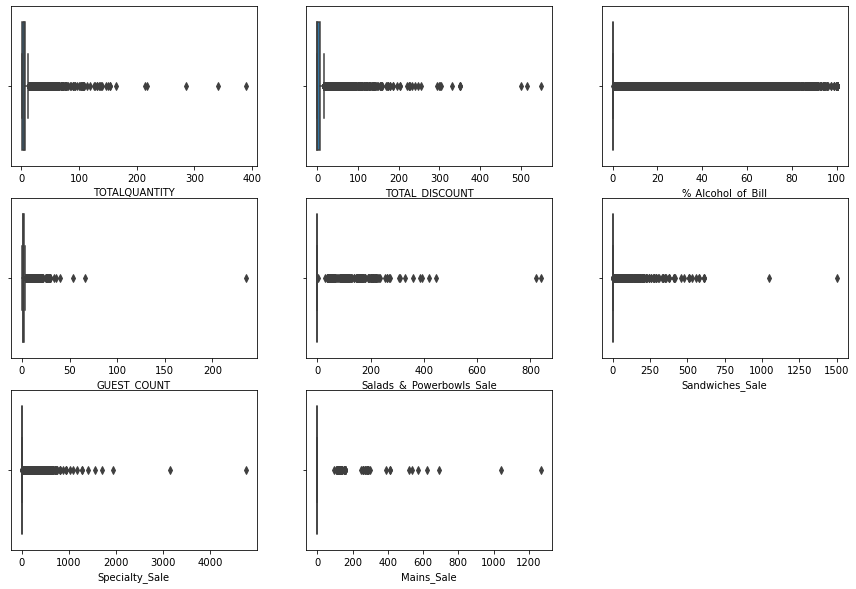

In [46]:
plt.figure(figsize=(15,10))
numeric_col=['TOTALQUANTITY','TOTAL_DISCOUNT', '%_Alcohol_of_Bill', 'GUEST_COUNT','Salads_&_Powerbowls_Sale','Sandwiches_Sale','Specialty_Sale','Mains_Sale']
plot_num=1
for i in numeric_col:
    if plot_num<=8:
        ax=plt.subplot(3,3,plot_num)
        sns.boxplot(x=data_new[i])
        
    plot_num +=1
plt.show()
    

The box plots reveal the presence of outliers and variability in the selected numeric columns. The wide spread in some columns indicates high variability, while the outliers suggest extreme values that could influence the overall analysis. 

# Step 3: Feature Scaling

In [47]:
label=LabelEncoder()
data_new['SECONDVISITFLAG']=label.fit_transform(data_new['SECONDVISITFLAG'])

# Handling Imbalanced Dataset:
The distribution shows that 89.6% of the entries have 'N' (no second visit), and only 10.4% have 'Y' (second visit). This is a clear indication of imbalance in this column

In [75]:
x=data_new.drop(columns=['SECONDVISITFLAG'])
y=data_new['SECONDVISITFLAG']
#apply smote to dataset
smote=SMOTE(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled=smote.fit_resample(x,y)

#cheack the distribution after resampling
y_resampled_distribution=y_resampled.value_counts(normalize=True)
print('after resampling :','\n',y_resampled_distribution)

after resampling : 
 0    0.5
1    0.5
Name: SECONDVISITFLAG, dtype: float64


# A. Construct a predictive model aimed at predicting the probability of a customer making a repeat visit.

# Step 4: Model Training

In [68]:
#feautures=['TOTALQUANTITY','TOTAL_DISCOUNT','GUEST_COUNT','Total_Sales']
x=data_new.drop('SECONDVISITFLAG',axis=1)
y=data_new['SECONDVISITFLAG']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(Y_train))
 
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
 
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

models={'logistic Regression': LogisticRegression(),
       'Decisoin Tree ': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'XGBoost':XGBClassifier(),
        'BernoulliNB':BernoulliNB()
       }
#train and evaluate each model
for model_name,model in models.items():
    model.fit(X_train_resampled,Y_train_resampled)
    y_pred=model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    accuracy=accuracy_score(Y_test,y_pred)
    confusion_mx=confusion_matrix(Y_test,y_pred)
    roc_auc = roc_auc_score(Y_test, y_prob)
    print(f'{model_name} Accuracy : {accuracy :.2f}')
    print(f'{model_name} ROC-AUC Score: {roc_auc:.2f}')
    print(f'confusion_matrix : {confusion_mx}')
    print('F1-score: ',f1_score(Y_test,y_pred),'\n')
  


Class distribution before SMOTE: Counter({0: 170965, 1: 19883})
Class distribution after SMOTE: Counter({0: 170965, 1: 170965})


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic Regression Accuracy : 0.54
logistic Regression ROC-AUC Score: 0.56
confusion_matrix : [[23072 19628]
 [ 2252  2761]]
F1-score:  0.20151813736223634 

Decisoin Tree  Accuracy : 0.78
Decisoin Tree  ROC-AUC Score: 0.55
confusion_matrix : [[36177  6523]
 [ 3852  1161]]
F1-score:  0.18287784516027408 

Random Forest Accuracy : 0.84
Random Forest ROC-AUC Score: 0.61
confusion_matrix : [[39549  3151]
 [ 4277   736]]
F1-score:  0.16539325842696628 

XGBoost Accuracy : 0.82
XGBoost ROC-AUC Score: 0.66
confusion_matrix : [[37804  4896]
 [ 3807  1206]]
F1-score:  0.21700404858299596 

BernoulliNB Accuracy : 0.54
BernoulliNB ROC-AUC Score: 0.55
confusion_matrix : [[22909 19791]
 [ 2297  2716]]
F1-score:  0.19738372093023257 



# XGBoost :XGBoost is the best model among those tested for predicting customer repeat visits. It has the highest ROC-AUC score, indicating good performance in distinguishing between classes, and a reasonable F1-score that balances precision and recall. While Random Forest has slightly higher accuracy, the ROC-AUC and F1-score suggest XGBoost provides a better overall prediction quality, especially in an imbalanced dataset scenario.


# B. Determine the primary factors influencing repeat visits.

# 1. Extract Feature Importance

In [69]:
model_xgb=XGBClassifier(random_state=42)
model_xgb.fit(X_train_resampled,Y_train_resampled)
importances = model_xgb.feature_importances_
feature_names = X_train_resampled.columns

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)


                     Feature  Importance
13                 NABs_Sale    0.094923
12                Pizza_Sale    0.074507
25  DISTANCE_TO_CLOSESTSTORE    0.073802
16         Small_Plates_Sale    0.070004
24               GUEST_COUNT    0.064662
19             Desserts_Sale    0.058035
7                 Soups_Sale    0.054125
15           Appetizers_Sale    0.051644
3                Salads_Sale    0.048997
22            TOTAL_DISCOUNT    0.046935
5          Mixed_Drinks_Sale    0.042517
6                Pastas_Sale    0.035086
1           Main_Plates_Sale    0.033734
8                  Beer_Sale    0.032600
17           Lunch_Duos_Sale    0.032350
0              TOTALQUANTITY    0.030320
9               Spirits_Sale    0.021347
21           Sandwiches_Sale    0.020083
14            Specialty_Sale    0.017481
26               Total_Sales    0.017048
4             Beverages_Sale    0.017023
18          Combo_Boxes_Sale    0.014826
10                 Wine_Sale    0.011682
2   Salads_&_Pow

NABs_Sale, Pizza_Sale, and DISTANCE_TO_CLOSESTSTORE are the top predictors, indicating that customer choices related to specific menu items and the store's location are crucial for predicting repeat visits.

# 2. Statistical Analysis

# a. Correlation Analysis

In [51]:
correlation_matrix = data_new.corr()
correlation_with_target = correlation_matrix['SECONDVISITFLAG'].sort_values(ascending=False)
print(correlation_with_target)


SECONDVISITFLAG             1.000000
Soups_Sale                  0.012484
Salads_Sale                 0.006436
Lunch_Duos_Sale             0.001861
Wine_Sale                   0.001217
Specialty_Sale             -0.000020
Salads_&_Powerbowls_Sale   -0.002192
Mains_Sale                 -0.002323
Kids_Sale                  -0.002479
Beverages_Sale             -0.002665
Sandwiches_Sale            -0.003388
Combo_Boxes_Sale           -0.004783
Spirits_Sale               -0.004812
%_Alcohol_of_Bill          -0.006625
Desserts_Sale              -0.007022
Beer_Sale                  -0.009437
Pastas_Sale                -0.010262
Main_Plates_Sale           -0.010394
Main_Plate_Revenue         -0.011465
TOTAL_DISCOUNT             -0.012382
Appetizers_Sale            -0.016705
DISTANCE_TO_CLOSESTSTORE   -0.018898
Small_Plates_Sale          -0.022089
Mixed_Drinks_Sale          -0.025945
Total_Sales                -0.034197
GUEST_COUNT                -0.035137
TOTALQUANTITY              -0.035179
P

- Focus on Positive Influencers: While the positive correlations are weak, promoting items like soups and salads might have a slight positive impact on encouraging repeat visits.
- Investigate Negative Influencers: The negative correlation with pizza sales and total quantity suggests a need to investigate why higher sales in these categories are associated with fewer second visits. It could be related to customer satisfaction, pricing, or other factors.


# b. Feature Selection Techniques

In [70]:
from sklearn.feature_selection import RFE

selector = RFE(model_xgb, n_features_to_select=10)
selector = selector.fit(X_train_resampled, Y_train_resampled)

# Get the selected features
selected_features = X_train_resampled.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['Salads_Sale', 'Soups_Sale', 'Pizza_Sale', 'NABs_Sale',
       'Appetizers_Sale', 'Small_Plates_Sale', 'Desserts_Sale',
       'TOTAL_DISCOUNT', 'GUEST_COUNT', 'DISTANCE_TO_CLOSESTSTORE'],
      dtype='object')


The most significant factors influencing repeat visits are  'Salads_Sale', 'Pizza_Sale', 'NABs_Sale',
       'Appetizers_Sale', 'Lunch_Duos_Sale', 'TOTAL_DISCOUNT', 'GUEST_COUNT',
       'DISTANCE_TO_CLOSESTSTORE', 'Total_Sales'.

# 3. Model Coefficients (For Linear Models)

In [71]:
# Initialize and train the model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_resampled, Y_train_resampled)

# Get the coefficients
coefficients = log_model.coef_[0]
coef_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                     Feature  Coefficient
7                 Soups_Sale     0.020850
4             Beverages_Sale     0.012782
19             Desserts_Sale     0.011211
3                Salads_Sale     0.010394
17           Lunch_Duos_Sale     0.010214
1           Main_Plates_Sale     0.007692
10                 Wine_Sale     0.007147
8                  Beer_Sale     0.006745
15           Appetizers_Sale     0.005381
6                Pastas_Sale     0.004991
22            TOTAL_DISCOUNT     0.003205
23         %_Alcohol_of_Bill     0.002678
14            Specialty_Sale     0.001932
18          Combo_Boxes_Sale     0.001104
27        Main_Plate_Revenue    -0.000297
12                Pizza_Sale    -0.000495
25  DISTANCE_TO_CLOSESTSTORE    -0.000651
26               Total_Sales    -0.001238
11                Mains_Sale    -0.003376
2   Salads_&_Powerbowls_Sale    -0.003533
21           Sandwiches_Sale    -0.006204
5          Mixed_Drinks_Sale    -0.009177
13                 NABs_Sale    -0

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Focus on Positive Features: Emphasize features with positive contributions (like Soups_Sale and Beverages_Sale) in your marketing and operational strategies.
- Address Negative Features: Investigate and potentially mitigate the negative effects of features like GUEST_COUNT and TOTALQUANTITY.






# Assessing the Model's Performance


# 1.Evaluate Performance Metrics:

In [54]:
data_new.shape

(238561, 29)

In [60]:
y_pred = model_xgb.predict(X_test)
y_prob = model_xgb.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, y_prob))
print('F1-score: ',f1_score(Y_test,y_pred))

Accuracy: 0.8948504600423365
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     42700
           1       0.39      0.00      0.00      5013

    accuracy                           0.89     47713
   macro avg       0.64      0.50      0.47     47713
weighted avg       0.84      0.89      0.85     47713

ROC-AUC Score: 0.7028706977782824
F1-score:  0.0027827469687934803


 - Strenght:
  - High overall accuracy and excellent performance in predicting non-repeat visits.
  - Good ROC-AUC score shows strong model performance in distinguishing between the two classes.

 - Weakness:
  - The model struggles with identifying repeat visits (class 1), as indicated by low recall and F1-score for this class.
  - Precision for class 1 is relatively lower, showing room for improvement in correctly predicting repeat visits.


# 2. Check Confusion Matrix:

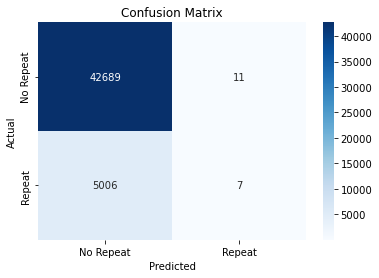

In [56]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Repeat', 'Repeat'], 
            yticklabels=['No Repeat', 'Repeat'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1.The model is effective at predicting non-repeat visits with high accuracy and low false positive rate.

2.The model struggles to identify repeat visits, resulting in a high number of false negatives. This suggests that while the overall accuracy is high, the model’s ability to correctly identify repeat visits (class 1) is limited.


# C. Offer actionable insights and recommendations derived from the model's insights to bolster customer retention initiatives and foster business expansion.


# #Actionable Insights and Recommendations

# 1.Enhance Repeat Visit Identification:
- Adjust Thresholds: Lower the classification threshold to improve recall for identifying repeat visitors.
- Refine Segmentation: Use clustering to segment customers and tailor retention strategies to each segment’s needs.

# 2.Optimize Marketing and Promotions:
- Targeted Offers: Create personalized campaigns with discounts for likely repeat customers.
- Loyalty Programs: Implement promotions and rewards to encourage repeat visits.

# 3. Improve Customer Experience:

- Address Negative Factors: Mitigate issues like store distance by offering delivery options or expanding locations.
- Enhance Experience: Invest in better service, ambiance, and overall customer experience to boost satisfaction.

# 4. Leverage Customer Feedback:

- Collect Feedback: Regularly gather and analyze customer feedback to drive improvements.
- Engage Loyal Customers: Build relationships through exclusive offers and personalized communication.

# 5. Enhance Product and Sales Strategies:

- Review Sales Data: Promote high-performing products and ensure availability.
- Optimize Pricing: Adjust pricing and discounts based on effectiveness and profitability.

# 6.Address Class Imbalance:

- Data Enrichment: Add more features or external data to improve model predictions.
- Model Improvement: Continuously refine the model with techniques like cross-validation and feature engineering.

# Implementation Plan
- Strategy Document: Develop a detailed plan with actions, timelines, and responsibilities.
- Pilot Programs: Test strategies in select areas before full-scale rollout.
- Monitor and Measure: Track key performance indicators and adjust as needed.
- Feedback Loop: Use customer and staff feedback to continuously enhance strategies.

In [57]:
data_new

,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,Spirits_Sale,...,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE,SECONDVISITFLAG,Total_Sales,Main_Plate_Revenue
0,17,0.0,0.0,26.28,0.0,0.0,0.00,6.99,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,6,4.468420,0,154.56,0.0
1,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,10.00,0.0,1,4.468420,0,7.69,0.0
2,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,1,4.468420,0,12.99,0.0
3,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,6.29,0.0,0.0,0.00,0.0,1,1.531161,0,22.28,0.0
4,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,1,1.531161,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239741,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,5.00,0.0,1,3.549361,1,0.00,0.0
239742,10,0.0,55.0,57.97,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,1,11.908136,1,229.91,0.0
239743,5,0.0,0.0,0.00,0.0,0.0,9.12,0.00,0.0,0.0,...,0.00,0.0,0.0,31.40,0.0,1,6.669160,1,26.13,0.0
239744,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.00,0.0,0,12.951460,1,16.99,0.0


In [58]:
data

,Customer_ID,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,...,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE,SECONDVISITFLAG
0,138721796,17,0.0,0.0,26.28,0.0,0.0,0.00,6.99,0.0,...,22.90,0.0,0.00,0.0,0.0,0.00,0.0,6,4.468420,N
1,138530825,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,10.00,0.0,1,4.468420,N
2,138722449,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,4.468420,N
3,138729131,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,6.29,0.0,0.0,0.00,0.0,1,1.531161,N
4,138725186,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,1.531161,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239741,154236949,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,5.00,0.0,1,3.549361,Y
239742,154239880,10,0.0,55.0,57.97,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,11.908136,Y
239743,154242996,5,0.0,0.0,0.00,0.0,0.0,9.12,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,31.40,0.0,1,6.669160,Y
239744,154242268,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,12.951460,Y


In [59]:
data

,Customer_ID,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,...,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE,SECONDVISITFLAG
0,138721796,17,0.0,0.0,26.28,0.0,0.0,0.00,6.99,0.0,...,22.90,0.0,0.00,0.0,0.0,0.00,0.0,6,4.468420,N
1,138530825,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,10.00,0.0,1,4.468420,N
2,138722449,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,4.468420,N
3,138729131,3,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,6.29,0.0,0.0,0.00,0.0,1,1.531161,N
4,138725186,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,1.531161,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239741,154236949,1,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,5.00,0.0,1,3.549361,Y
239742,154239880,10,0.0,55.0,57.97,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,11.908136,Y
239743,154242996,5,0.0,0.0,0.00,0.0,0.0,9.12,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,31.40,0.0,1,6.669160,Y
239744,154242268,2,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,12.951460,Y
